## Merging news data with daily weather data

In [867]:
import pandas as pd  # Library for data manipulation and analysis

In [868]:
# Load the cleaned news data and the daily weather data 
news_df = pd.read_csv('DATA/News_data.csv')
weather_daily_df = pd.read_csv('DATA/weather_data_daily.csv')

In [869]:
# Displaying the "news_df" DataFrame to review its contents.
news_df

,Date,month,article count
0,2011-01-02,2011-01,1
1,2011-01-03,2011-01,2
2,2011-01-04,2011-01,2
3,2011-01-05,2011-01,2
4,2011-01-06,2011-01,2
...,...,...,...
3607,2023-08-10,2023-08,2
3608,2023-08-11,2023-08,5
3609,2023-08-12,2023-08,3
3610,2023-08-13,2023-08,2


In [870]:
weather_daily_df

,date,mean_temp,mean_wind_speed,acc_precip,mean_temp_deviation,mean_wind_speed_deviation,acc_precip_deviation
0,2011-01-01,2.2,7.8,0.5,-0.6,2.5,-1.7
1,2011-01-02,-1.8,2.7,0.0,-4.6,-2.6,-2.2
2,2011-01-03,-3.7,2.3,0.2,-6.5,-3.0,-2.0
3,2011-01-04,-0.3,5.3,2.1,-3.1,-0.0,-0.1
4,2011-01-05,-1.2,6.6,1.4,-4.0,1.3,-0.8
...,...,...,...,...,...,...,...
4604,2023-08-10,17.5,6.1,0.1,-1.3,2.0,-2.6
4605,2023-08-11,21.7,3.5,0.0,2.9,-0.6,-2.7
4606,2023-08-12,21.1,2.7,7.3,2.3,-1.4,4.6
4607,2023-08-13,21.5,3.8,0.3,2.7,-0.3,-2.4


In [871]:
# Merge the weather data (`weather_daily_df`) with the news data (`news_df`) using the 'date' column from `weather_daily_df` and 'Date' column from `news_df`
merged_daily_df = weather_daily_df.merge(news_df[['Date', 'article count']], left_on='date', right_on='Date', how='left')

# Drop the 'Date' column from `news_df` as it's redundant now
merged_daily_df.drop(columns='Date', inplace=True)

# Fill any NaN values in the 'article count' column with 0 and convert to integer
merged_daily_df['article count'] = merged_daily_df['article count'].fillna(0).astype(int)

# Save the merged dataframe to a CSV file
merged_daily_df.to_csv('DATA/Final_daily_data.csv', index=False)

# Display the merged DataFrame
merged_daily_df


,date,mean_temp,mean_wind_speed,acc_precip,mean_temp_deviation,mean_wind_speed_deviation,acc_precip_deviation,article count
0,2011-01-01,2.2,7.8,0.5,-0.6,2.5,-1.7,0
1,2011-01-02,-1.8,2.7,0.0,-4.6,-2.6,-2.2,1
2,2011-01-03,-3.7,2.3,0.2,-6.5,-3.0,-2.0,2
3,2011-01-04,-0.3,5.3,2.1,-3.1,-0.0,-0.1,2
4,2011-01-05,-1.2,6.6,1.4,-4.0,1.3,-0.8,2
...,...,...,...,...,...,...,...,...
4604,2023-08-10,17.5,6.1,0.1,-1.3,2.0,-2.6,2
4605,2023-08-11,21.7,3.5,0.0,2.9,-0.6,-2.7,5
4606,2023-08-12,21.1,2.7,7.3,2.3,-1.4,4.6,3
4607,2023-08-13,21.5,3.8,0.3,2.7,-0.3,-2.4,2


In [872]:
# Create a '2019 struc dummy' column in the merged_daily_df dataframe.
# This column is assigned a value of 1 for dates after January 1, 2019, and 0 otherwise.
merged_daily_df['2019 struc dummy'] = (merged_daily_df['date'] > '2019-01-01').astype(int)

# Display the updated dataframe.
merged_daily_df


,date,mean_temp,mean_wind_speed,acc_precip,mean_temp_deviation,mean_wind_speed_deviation,acc_precip_deviation,article count,2019 struc dummy
0,2011-01-01,2.2,7.8,0.5,-0.6,2.5,-1.7,0,0
1,2011-01-02,-1.8,2.7,0.0,-4.6,-2.6,-2.2,1,0
2,2011-01-03,-3.7,2.3,0.2,-6.5,-3.0,-2.0,2,0
3,2011-01-04,-0.3,5.3,2.1,-3.1,-0.0,-0.1,2,0
4,2011-01-05,-1.2,6.6,1.4,-4.0,1.3,-0.8,2,0
...,...,...,...,...,...,...,...,...,...
4604,2023-08-10,17.5,6.1,0.1,-1.3,2.0,-2.6,2,1
4605,2023-08-11,21.7,3.5,0.0,2.9,-0.6,-2.7,5,1
4606,2023-08-12,21.1,2.7,7.3,2.3,-1.4,4.6,3,1
4607,2023-08-13,21.5,3.8,0.3,2.7,-0.3,-2.4,2,1


In [873]:
# Group by '2019 struc dummy' and compute the mean for each deviation parameter
averages = merged_daily_df.groupby('2019 struc dummy')[['mean_temp_deviation', 'mean_wind_speed_deviation', 'acc_precip_deviation']].mean()

# Display the results
averages


,mean_temp_deviation,mean_wind_speed_deviation,acc_precip_deviation
2019 struc dummy,,,
0,-1.235785,0.058091,-0.038214
1,2.161269,-0.100000,0.054389


## Visualization

In [874]:
# Importing required visualization libraries:
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns            # Advanced statistical plotting library

In [875]:
# Extract relevant columns
columns_of_interest = ['mean_temp_deviation', 'mean_wind_speed_deviation', 'acc_precip_deviation', 'article count']

# Compute descriptive statistics for the entire dataset
desc_stats = merged_daily_df[columns_of_interest].describe()

# Update the 'count' for 'article count' to represent the total number of articles
desc_stats.loc['count', 'article count'] = merged_daily_df['article count'].sum()

# Compute correlation with 'article count' for each variable including itself
correlations = merged_daily_df[columns_of_interest].corr()['article count']

# Append correlations to desc_stats
desc_stats.loc['Corr. w. article Count'] = correlations

# Format the DataFrame
def format_value(x):
    if pd.isna(x):
        return x
    elif x == int(x):
        return '{:.0f}'.format(x)
    else:
        return '{:.1f}'.format(x)

desc_stats = desc_stats.applymap(format_value)
desc_stats.loc['count'] = desc_stats.loc['count'].apply(lambda x: '{:.0f}'.format(float(x)))

# Display the modified descriptive statistics table
desc_stats


,mean_temp_deviation,mean_wind_speed_deviation,acc_precip_deviation,article count
count,4609,4609,4609,9718
mean,0.0,0.0,-0.0,2.1
std,3.6,1.8,3.2,2.1
min,-14.1,-4,-2.7,0
25%,-2.5,-1.3,-2,1
50%,-0.1,-0.2,-1.2,2
75%,2.5,1.2,0.7,3
max,13.9,8.8,29.5,20
Corr. w. article Count,0.2,0.0,-0.0,1


In [876]:
# Convert the dataframe to latex format
latex_code = desc_stats.to_latex(caption="Descriptive Statistics", column_format="lcc")

# Add necessary LaTeX table commands
latex_code = latex_code.replace("\\begin{tabular}", "\\begin{table}[h]\n    \\centering")
latex_code = latex_code.replace("\\end{tabular}", "\\end{tabular}\n\\end{table}")
latex_code = latex_code.replace("\\toprule", "\\toprule\n        {} & Column 1 & Column 2 \\\\")
latex_code = latex_code.replace("\\midrule", "\\midrule")

print(latex_code)


\begin{table}
\centering
\caption{Descriptive Statistics}
\begin{table}[h]
    \centering{lcc}
\toprule
        {} & Column 1 & Column 2 \\
{} & mean\_temp\_deviation & mean\_wind\_speed\_deviation & acc\_precip\_deviation & article count \\
\midrule
count                  &                4609 &                      4609 &                 4609 &          9718 \\
mean                   &                 0.0 &                       0.0 &                 -0.0 &           2.1 \\
std                    &                 3.6 &                       1.8 &                  3.2 &           2.1 \\
min                    &               -14.1 &                        -4 &                 -2.7 &             0 \\
25\%                    &                -2.5 &                      -1.3 &                   -2 &             1 \\
50\%                    &                -0.1 &                      -0.2 &                 -1.2 &             2 \\
75\%                    &                 2.5 &          

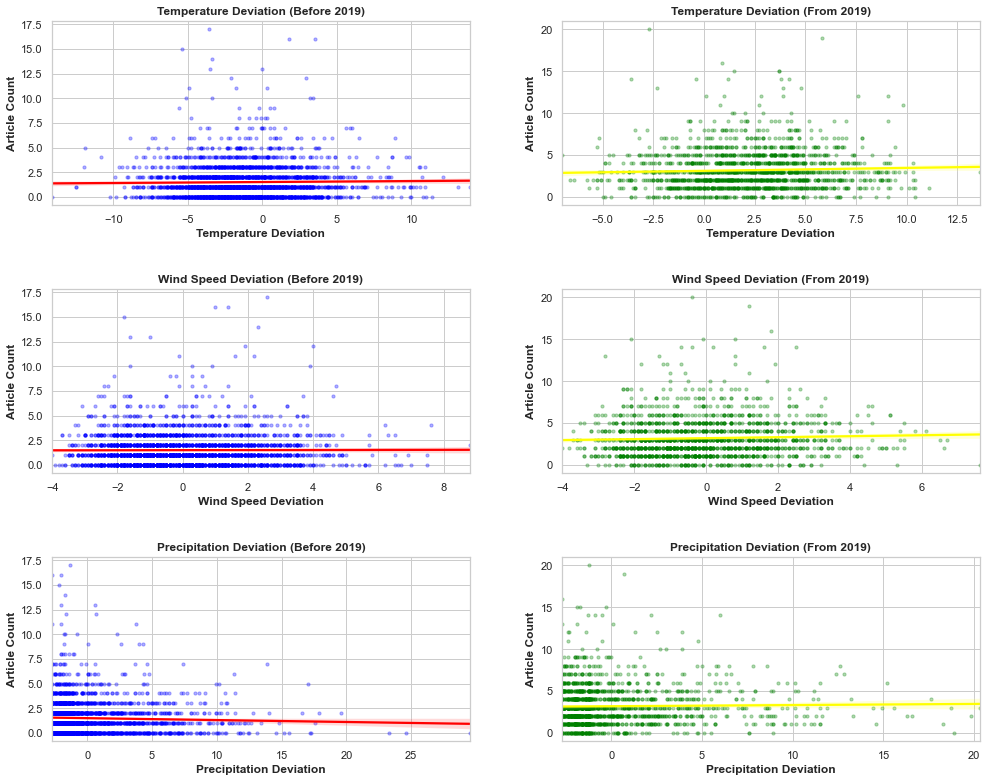

In [877]:
# Segment data into two categories based on the 2019 threshold.
before_2019 = merged_daily_df[merged_daily_df['date'] < '2019-01-01']
after_2019 = merged_daily_df[merged_daily_df['date'] >= '2019-01-01']

deviation_variables = ['mean_temp_deviation', 'mean_wind_speed_deviation', 'acc_precip_deviation']
labels = ['Temperature Deviation', 'Wind Speed Deviation', 'Precipitation Deviation']

# Initialize a figure layout with multiple subplots.
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
fig.tight_layout(pad=5.0)

for i, (var, label) in enumerate(zip(deviation_variables, labels)):
    
    # Plot data prior to 2019: Scatter plot complemented by a regression line.
    sns.regplot(x=before_2019[var], y=before_2019['article count'], ax=axes[i, 0], color='blue', scatter_kws={'s': 10, 'alpha': 0.3}, line_kws={'color': 'red'})
    axes[i, 0].set_title(f"{label} (Before 2019)", fontweight='bold')
    axes[i, 0].set_xlabel(label, fontweight='bold')
    axes[i, 0].set_ylabel('Article Count', fontweight='bold')
    
    # Plot data from 2019 onward: Scatter plot complemented by a regression line.
    sns.regplot(x=after_2019[var], y=after_2019['article count'], ax=axes[i, 1], color='green', scatter_kws={'s': 10, 'alpha': 0.3}, line_kws={'color': 'yellow'})
    axes[i, 1].set_title(f"{label} (From 2019)", fontweight='bold')
    axes[i, 1].set_xlabel(label, fontweight='bold')
    axes[i, 1].set_ylabel('Article Count', fontweight='bold')

# Render the visualizations.
plt.show()


# Analysis

In [878]:
import statsmodels.api as sm  # For statistical tests and models.
import numpy as np  # Library for numerical operations

## 1 week articles = deviation variables before/from 2019

In [879]:
# Create a copy of the dataset to ensure the original remains intact
df_copy_1 = merged_daily_df.copy()

# Aggregate 'article count' for a week (current date and the next 6 dates)
df_copy_1['sum_article_week'] = sum([df_copy_1['article count'].shift(-i) for i in range(7)])

# Exclude the final six rows, which will have NaN values due to the shift operation
df_copy_1.dropna(subset=['sum_article_week'], inplace=True)

# Construct interaction terms by multiplying deviation variables with "2019 struc dummy"
# These interaction terms will capture post-2019 effects
for column in ['mean_temp_deviation', 'mean_wind_speed_deviation', 'acc_precip_deviation']:
    df_copy_1[f"{column}_post_2019"] = df_copy_1[column] * df_copy_1['2019 struc dummy']
    if '2019 struc dummy' in df_copy_1 and df_copy_1['2019 struc dummy'].iloc[0] == 0:
        df_copy_1[f"{column}_pre_2019"] = df_copy_1[column]

# Select the independent variables for the regression model and the dependent variable
independent_vars = [
    'mean_temp_deviation_pre_2019', 'mean_wind_speed_deviation_pre_2019', 'acc_precip_deviation_pre_2019',
    'mean_temp_deviation_post_2019', 'mean_wind_speed_deviation_post_2019', 'acc_precip_deviation_post_2019'
]

X = df_copy_1[independent_vars]
X = sm.add_constant(X)  # Integrate a constant term for the regression intercept
y = df_copy_1['sum_article_week']

# Conduct the OLS regression and present the results
model_1 = sm.OLS(y, X).fit()
print(model_1.summary())


                            OLS Regression Results                            
Dep. Variable:       sum_article_week   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     93.30
Date:                Wed, 23 Aug 2023   Prob (F-statistic):          6.22e-111
Time:                        02:29:29   Log-Likelihood:                -16653.
No. Observations:                4603   AIC:                         3.332e+04
Df Residuals:                    4596   BIC:                         3.337e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

## 1 week articles = ABSOLUTE deviation variables before/from 2019

In [880]:

# Create a copy of the dataset to ensure the original remains unaltered
df_copy_2 = merged_daily_df.copy()

# Aggregate 'article count' over a 7-day window (including the current date and next 6 dates)
df_copy_2['sum_article_week'] = sum([df_copy_2['article count'].shift(-i) for i in range(7)])

# Exclude the last six entries which will contain NaN values due to the shift operation
df_copy_2.dropna(subset=['sum_article_week'], inplace=True)

# Construct interaction terms by multiplying the absolute deviation variables with the "2019 struc dummy"
# These interaction terms help capture post-2019 effects with an emphasis on magnitude
for column in ['mean_temp_deviation', 'mean_wind_speed_deviation', 'acc_precip_deviation']:
    df_copy_2[f"absolute_{column}_post_2019"] = df_copy_2[column].abs() * df_copy_2['2019 struc dummy']
    if '2019 struc dummy' in df_copy_2 and df_copy_2['2019 struc dummy'].iloc[0] == 0:
        df_copy_2[f"absolute_{column}_pre_2019"] = df_copy_2[column].abs()

# Convert the original deviation variables to absolute values
for column in ['mean_temp_deviation', 'mean_wind_speed_deviation', 'acc_precip_deviation']:
    df_copy_2[f"absolute_{column}"] = df_copy_2[column].abs()

# Define the independent variables for regression and the dependent variable
independent_vars = [
    'absolute_mean_temp_deviation_pre_2019', 'absolute_mean_wind_speed_deviation_pre_2019', 'absolute_acc_precip_deviation_pre_2019',
    'absolute_mean_temp_deviation_post_2019', 'absolute_mean_wind_speed_deviation_post_2019', 'absolute_acc_precip_deviation_post_2019'
]

X = df_copy_2[independent_vars]
X = sm.add_constant(X)  # Integrate a constant term for the regression intercept
y = df_copy_2['sum_article_week']

# Execute the OLS regression and present the results
model_2 = sm.OLS(y, X).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:       sum_article_week   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     309.1
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        02:29:29   Log-Likelihood:                -16138.
No. Observations:                4603   AIC:                         3.229e+04
Df Residuals:                    4596   BIC:                         3.233e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

## 1 week articles = SQUARED deviation variables before/from 2019

In [881]:
# Create a copy of the dataset to ensure the original remains unaltered
df_copy_3 = merged_daily_df.copy()

# Aggregate 'article count' over a 7-day window (including the current date and next 6 dates)
df_copy_3['sum_article_week'] = sum([df_copy_3['article count'].shift(-i) for i in range(7)])

# Exclude the last six entries which will contain NaN values due to the shift operation
df_copy_3.dropna(subset=['sum_article_week'], inplace=True)

# Square the deviation variables to capture the nonlinear effect
for column in ['mean_temp_deviation', 'mean_wind_speed_deviation', 'acc_precip_deviation']:
    df_copy_3[f"squared_{column}"] = df_copy_3[column] ** 2
    if '2019 struc dummy' in df_copy_3 and df_copy_3['2019 struc dummy'].iloc[0] == 0:
        df_copy_3[f"squared_{column}_pre_2019"] = df_copy_3[column] ** 2

# Construct interaction terms by multiplying squared deviation variables with the "2019 struc dummy"
# This emphasizes any nonlinear effect that becomes pronounced post-2019
for column in ['squared_mean_temp_deviation', 'squared_mean_wind_speed_deviation', 'squared_acc_precip_deviation']:
    df_copy_3[f"{column}_post_2019"] = df_copy_3[column] * df_copy_3['2019 struc dummy']

# Define the independent variables (squared) for regression and the dependent variable
independent_vars = [
    'squared_mean_temp_deviation_pre_2019', 'squared_mean_wind_speed_deviation_pre_2019', 'squared_acc_precip_deviation_pre_2019',
    'squared_mean_temp_deviation_post_2019', 'squared_mean_wind_speed_deviation_post_2019', 'squared_acc_precip_deviation_post_2019'
]

X = df_copy_3[independent_vars]
X = sm.add_constant(X)  # Integrate a constant term for the regression intercept
y = df_copy_3['sum_article_week']

# Execute the OLS regression and present the results
model_3 = sm.OLS(y, X).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:       sum_article_week   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     154.7
Date:                Wed, 23 Aug 2023   Prob (F-statistic):          1.92e-179
Time:                        02:29:29   Log-Likelihood:                -16494.
No. Observations:                4603   AIC:                         3.300e+04
Df Residuals:                    4596   BIC:                         3.305e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

## log of 1 week articles = deviation variables before/from 2019

In [882]:
# Create a fresh copy of the dataset to ensure the original remains unchanged
df_copy_4 = merged_daily_df.copy()

# Calculate the aggregated 'article count' over a 7-day window (current date and the succeeding 6 dates)
df_copy_4['sum_article_week'] = sum([df_copy_4['article count'].shift(-i) for i in range(7)])

# Omit the final six entries containing NaN values resulting from the shift operation
df_copy_4.dropna(subset=['sum_article_week'], inplace=True)

# Apply a natural logarithmic transformation on 'sum_article_week', incremented by 1 to handle zeros
df_copy_4['log_sum_article_week'] = np.log(df_copy_4['sum_article_week'] + 1)

# Construct interaction terms: Multiply deviation variables with the "2019 struc dummy" to emphasize post-2019 effects
for column in ['mean_temp_deviation', 'mean_wind_speed_deviation', 'acc_precip_deviation']:
    df_copy_4[f"{column}_post_2019"] = df_copy_4[column] * df_copy_4['2019 struc dummy']
    if '2019 struc dummy' in df_copy_4 and df_copy_4['2019 struc dummy'].iloc[0] == 0:
        df_copy_4[f"{column}_pre_2019"] = df_copy_4[column]

# Identify the independent variables for regression, and the dependent variable
independent_vars = [
    'mean_temp_deviation_pre_2019', 'mean_wind_speed_deviation_pre_2019', 'acc_precip_deviation_pre_2019',
    'mean_temp_deviation_post_2019', 'mean_wind_speed_deviation_post_2019', 'acc_precip_deviation_post_2019'
]

X = df_copy_4[independent_vars]
X = sm.add_constant(X)  # Include a constant term for the regression intercept
y = df_copy_4['log_sum_article_week']  # Employ the logarithmically transformed dependent variable

# Conduct the OLS regression and display the results
model_4 = sm.OLS(y, X).fit()
print(model_4.summary())

                             OLS Regression Results                             
Dep. Variable:     log_sum_article_week   R-squared:                       0.121
Model:                              OLS   Adj. R-squared:                  0.120
Method:                   Least Squares   F-statistic:                     105.6
Date:                  Wed, 23 Aug 2023   Prob (F-statistic):          4.94e-125
Time:                          02:29:29   Log-Likelihood:                -3709.2
No. Observations:                  4603   AIC:                             7432.
Df Residuals:                      4596   BIC:                             7477.
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

## log of 1 week articles = ABSOLUTE deviation variables before/from 2019

In [883]:
# Initiate a copy of the dataset to maintain the original dataset unaltered.
df_copy_5 = merged_daily_df.copy()

# Calculate the total of 'article count' spanning a week, inclusive of the current day plus the succeeding 6 days.
df_copy_5['sum_article_week'] = sum([df_copy_5['article count'].shift(-i) for i in range(7)])

# Exclude the trailing six rows, which contain NaN values due to the shift operation, to ensure data consistency.
df_copy_5.dropna(subset=['sum_article_week'], inplace=True)

# Apply a logarithmic transformation to the 'sum_article_week' to smoothen data distribution. The '+1' ensures non-zero values.
df_copy_5['log_sum_article_week'] = np.log(df_copy_5['sum_article_week'] + 1)

# Create interaction variables: Each deviation metric is interacted with the "2019 struc dummy", denoting data from 2019 onward.
# Subsequently, the absolute value of these interactions is derived to ensure non-negative values.
for column in ['mean_temp_deviation', 'mean_wind_speed_deviation', 'acc_precip_deviation']:
    df_copy_5[f"absolute_{column}_post_2019"] = (df_copy_5[column].abs() * df_copy_5['2019 struc dummy']).abs()

# Convert the deviation metrics to absolute values to prevent sign variations.
# The resulting variables are labeled with "absolute_" and "_pre_2019" to differentiate from post-2019 data.
for column in ['mean_temp_deviation', 'mean_wind_speed_deviation', 'acc_precip_deviation']:
    df_copy_5[f"absolute_{column}_pre_2019"] = df_copy_5[column].abs()

# Identify the independent (predictor) variables, both from before and after 2019, and the logarithmically transformed dependent (outcome) variable.
independent_vars = [
    'absolute_mean_temp_deviation_pre_2019', 'absolute_mean_wind_speed_deviation_pre_2019', 'absolute_acc_precip_deviation_pre_2019',
    'absolute_mean_temp_deviation_post_2019', 'absolute_mean_wind_speed_deviation_post_2019', 'absolute_acc_precip_deviation_post_2019'
]

X = df_copy_5[independent_vars]
X = sm.add_constant(X)  # Incorporate a constant term to act as the regression intercept.
y = df_copy_5['log_sum_article_week']  # Set the logarithmically transformed column as the dependent variable.

# Implement the Ordinary Least Squares (OLS) regression and unveil the results.
model_5 = sm.OLS(y, X).fit()
print(model_5.summary())


                             OLS Regression Results                             
Dep. Variable:     log_sum_article_week   R-squared:                       0.323
Model:                              OLS   Adj. R-squared:                  0.322
Method:                   Least Squares   F-statistic:                     365.4
Date:                  Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                          02:29:29   Log-Likelihood:                -3108.8
No. Observations:                  4603   AIC:                             6232.
Df Residuals:                      4596   BIC:                             6277.
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

## log of 1 week articles = SQUARED deviation variables before/from 2019

In [884]:
# Initialize a copy of the dataset to preserve the original dataset's integrity
df_copy_6 = merged_daily_df.copy()

# Calculate the rolling sum of 'article count' across a 7-day window (inclusive of the current day and the subsequent 6 days)
df_copy_6['sum_article_week'] = sum([df_copy_6['article count'].shift(-i) for i in range(7)])

# Exclude the last six entries containing NaN values, a consequence of the shift operation
df_copy_6.dropna(subset=['sum_article_week'], inplace=True)

# Implement a natural logarithmic transformation to 'sum_article_week', augmented by 1 to handle zero counts
df_copy_6['log_sum_article_week'] = np.log(df_copy_6['sum_article_week'] + 1)

# Square each deviation variable
for column in ['mean_temp_deviation', 'mean_wind_speed_deviation', 'acc_precip_deviation']:
    df_copy_6[f"squared_{column}"] = df_copy_6[column] ** 2
    if '2019 struc dummy' in df_copy_6 and df_copy_6['2019 struc dummy'].iloc[0] == 0:
        df_copy_6[f"squared_{column}_pre_2019"] = df_copy_6[column] ** 2

# Generate interaction terms: Multiply squared deviation variables with the "2019 struc dummy" to indicate post-2019 interactions
for column in ['squared_mean_temp_deviation', 'squared_mean_wind_speed_deviation', 'squared_acc_precip_deviation']:
    df_copy_6[f"{column}_post_2019"] = df_copy_6[column] * df_copy_6['2019 struc dummy']

# Identify squared independent variables for regression, in addition to the logarithmically transformed dependent variable
independent_vars_6 = [
    'squared_mean_temp_deviation_pre_2019', 'squared_mean_wind_speed_deviation_pre_2019', 'squared_acc_precip_deviation_pre_2019',
    'squared_mean_temp_deviation_post_2019', 'squared_mean_wind_speed_deviation_post_2019', 'squared_acc_precip_deviation_post_2019'
]

X_6 = df_copy_6[independent_vars_6]
X_6 = sm.add_constant(X_6)  # Incorporate a constant term to serve as the regression intercept
y_6 = df_copy_6['log_sum_article_week']  # Rely on the logarithmically altered dependent variable

# Conduct the OLS regression and present the findings
model_6 = sm.OLS(y_6, X_6).fit()
print(model_6.summary())


                             OLS Regression Results                             
Dep. Variable:     log_sum_article_week   R-squared:                       0.194
Model:                              OLS   Adj. R-squared:                  0.193
Method:                   Least Squares   F-statistic:                     184.3
Date:                  Wed, 23 Aug 2023   Prob (F-statistic):          7.53e-211
Time:                          02:29:29   Log-Likelihood:                -3510.3
No. Observations:                  4603   AIC:                             7035.
Df Residuals:                      4596   BIC:                             7080.
Df Model:                             6                                         
Covariance Type:              nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [885]:
# The function 'extract_stats' aims to pull out and neatly format essential statistical measures from an OLS regression model's summary.
# This aids in the simplified comparison of different regression models.
def extract_stats(model):
    # Glean critical statistics from the model, like R-squared, F-statistic, AIC, and BIC.
    # These values are formatted to maintain consistency and readability.
    r2 = f"{model.rsquared:.2f}"
    f_stat = f"{model.fvalue:.2f}"
    aic = f"{model.aic:.2f}"
    bic = f"{model.bic:.2f}"
    
    # Fetch p-values associated with the predictors in the model. These assist in hypothesis testing.
    p_values = model.pvalues.map('{:.2f}'.format)

    # Return the formatted statistics as a dictionary.
    return {
        'R-squared': r2,
        'F-statistic': f_stat,
        'AIC': aic,
        'BIC': bic,
        'p-values': p_values
    }

# Use the above function to extract essential statistics for each model in consideration.
stats = [extract_stats(model) for model in [model_5, model_6]]

# Consolidate the statistics of both models into a DataFrame for easier viewing and comparison.
# Transposing the DataFrame rearranges it so models are columns and metrics are rows.
df_stats = pd.DataFrame(stats).T
df_stats.columns = ["Model 5", "Model 6"]

# Convert the consolidated statistical data into LaTeX format.
# This conversion aids in directly including the table in the exam paper
latex_code = df_stats.to_latex()

print(latex_code)

\begin{tabular}{lll}
\toprule
{} &                                            Model 5 &                                            Model 6 \\
\midrule
R-squared   &                                               0.32 &                                               0.19 \\
F-statistic &                                             365.37 &                                             184.26 \\
AIC         &                                            6231.69 &                                            7034.67 \\
BIC         &                                            6276.73 &                                            7079.72 \\
p-values    &  const                                         ... &  const                                         ... \\
\bottomrule
\end{tabular}



## Test of assumptions

In [886]:
# Importing required libraries:
import matplotlib.pyplot as plt  # Plotting library
from statsmodels.stats.stattools import durbin_watson  # Durbin-Watson test for autocorrelation
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Variance Inflation Factor calculation
from statsmodels.graphics.gofplots import qqplot  # QQ plot for checking normality

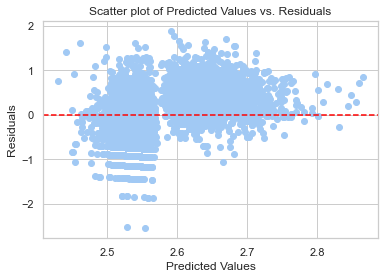

In [887]:
# Calculate the predicted values using the trained model (model_6)
predicted_values = model_6.predict(X)

# Calculate the residuals by subtracting the predicted values from the actual values (y_6)
residuals = y_6 - predicted_values

# Create a scatter plot to visualize the relationship between predicted values and residuals
plt.scatter(predicted_values, residuals)
plt.title("Scatter plot of Predicted Values vs. Residuals")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='red', linestyle='--')  # Add a red dashed line at y=0 for reference
plt.show()



In [888]:
# Calculate the Durbin-Watson statistic to assess autocorrelation in the residuals
dw_stat = durbin_watson(residuals)

# Print the calculated Durbin-Watson statistic
print(f"Durbin-Watson statistic: {dw_stat}")


Durbin-Watson statistic: 0.1120814375289322


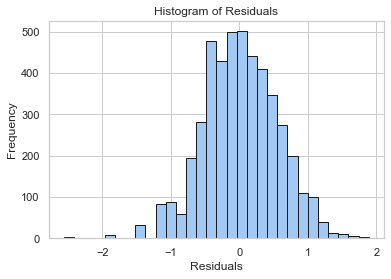

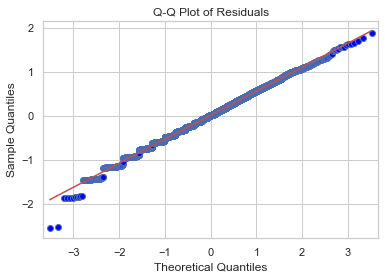

In [889]:
# Create a histogram to visualize the distribution of residuals
plt.hist(residuals, bins=30, edgecolor='k')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Create a Q-Q plot to assess normality of residuals
qqplot(residuals, line='s')
plt.title("Q-Q Plot of Residuals")
plt.show()


In [890]:
# Exclude the constant column for Variance Inflation Factor (VIF) calculation
X_excl_const = X.drop('const', axis=1)

# Create an empty DataFrame to store VIF values
vif_data = pd.DataFrame()

# Populate the DataFrame with variable names and their corresponding VIF values
vif_data["Variable"] = X_excl_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_excl_const.values, i) for i in range(X_excl_const.shape[1])]

# Print the VIF data
print(vif_data)


                                       Variable       VIF
0         absolute_mean_temp_deviation_pre_2019  3.137706
1   absolute_mean_wind_speed_deviation_pre_2019  3.013592
2        absolute_acc_precip_deviation_pre_2019  2.571885
3        absolute_mean_temp_deviation_post_2019  3.121965
4  absolute_mean_wind_speed_deviation_post_2019  2.993004
5       absolute_acc_precip_deviation_post_2019  2.645989
